In [0]:
import pandas as pd
import pickle
import glob
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [3]:
data = pd.read_csv("dataforggplot.csv")
data.head(5)

,Unnamed: 0,PIDM,White,Agex,FTIAC,PELL,SemCrAtt_Re,SEX,winterEnl_new,MaxOfDeg2,SemGPA,NoDeg,Bachelor,Assc,Cert
0,1,686256,1,<19,1,0,<=6,F,1,NoDeg,2.984383,0.418710,0.316023,0.102328,0.162940
1,2,776796,1,<19,1,0,>12,F,1,Assc,2.984383,0.363932,0.381288,0.156499,0.098281
2,3,800043,1,<19,1,0,6-12,F,0,NoDeg,2.984383,0.651050,0.102455,0.045384,0.201110
3,4,834049,1,<19,1,0,6-12,F,1,Assc,2.984383,0.479661,0.215291,0.158227,0.146821
4,5,842622,1,<19,1,0,6-12,F,1,Cert,2.984383,0.479661,0.215291,0.158227,0.146821


In [7]:
groupbydata = data[['Bachelor', 'Assc', 'Cert', 'winterEnl_new', 'SemCrAtt_Re']].groupby(['winterEnl_new', 'SemCrAtt_Re']).mean().reset_index()
groupbydata

,winterEnl_new,SemCrAtt_Re,Bachelor,Assc,Cert
0,0,6-12,0.102455,0.045384,0.201110
1,0,<=6,0.154844,0.030220,0.229795
2,0,>12,0.212241,0.052506,0.157464
3,1,6-12,0.215291,0.158227,0.146821
4,1,<=6,0.316023,0.102328,0.162940
5,1,>12,0.381288,0.156499,0.098281


In [69]:
def subsetModify(keywords_):
  subset = groupbydata[['winterEnl_new','SemCrAtt_Re', keywords_]]
  subset['winterEnl_new'] = subset['winterEnl_new'].map({1: 'Enroll', 0: 'Not Enroll'})
  subset['value'] = subset[keywords_]
  # subset['Type'] = keywords_ + " " + subset['winterEnl_new']
  subset['Type'] = keywords_
  # rename
  subset = subset.rename(columns={'winterEnl_new':'Enrollment Status'})
  return subset
# test
plot = subsetModify("Bachelor").append(subsetModify("Assc")).append(subsetModify("Cert"))
plot.head(5)

,Assc,Bachelor,Cert,Enrollment Status,SemCrAtt_Re,Type,value
0,NaN,0.102455,NaN,Not Enroll,6-12,Bachelor,0.102455
1,NaN,0.154844,NaN,Not Enroll,<=6,Bachelor,0.154844
2,NaN,0.212241,NaN,Not Enroll,>12,Bachelor,0.212241
3,NaN,0.215291,NaN,Enroll,6-12,Bachelor,0.215291
4,NaN,0.316023,NaN,Enroll,<=6,Bachelor,0.316023


<Figure size 2160x1440 with 0 Axes>

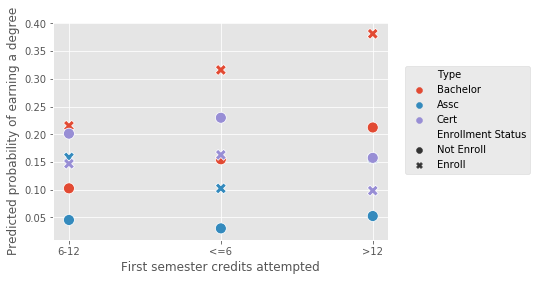

<Figure size 2160x1440 with 0 Axes>

In [80]:
# Use the 'hue' argument to provide a factor variable
sns.scatterplot( x="SemCrAtt_Re", y="value", data=plot, hue='Type', style="Enrollment Status", legend="brief", s=120)
 
# Move the legend to an empty part of the plot
# plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('First semester credits attempted')
plt.ylabel('Predicted probability of earning a degree')

plt.savefig('test.png', dpi=300, bbox_inches='tight')
plt.figure(figsize=(30,20))